In [17]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic regression data
X, y = make_regression(
    n_samples=100,
    n_features=100,
    n_informative=10,
    noise=10.0,
    random_state=42
)

print(X.shape) 
print(y.shape) 


(100, 100)
(100,)


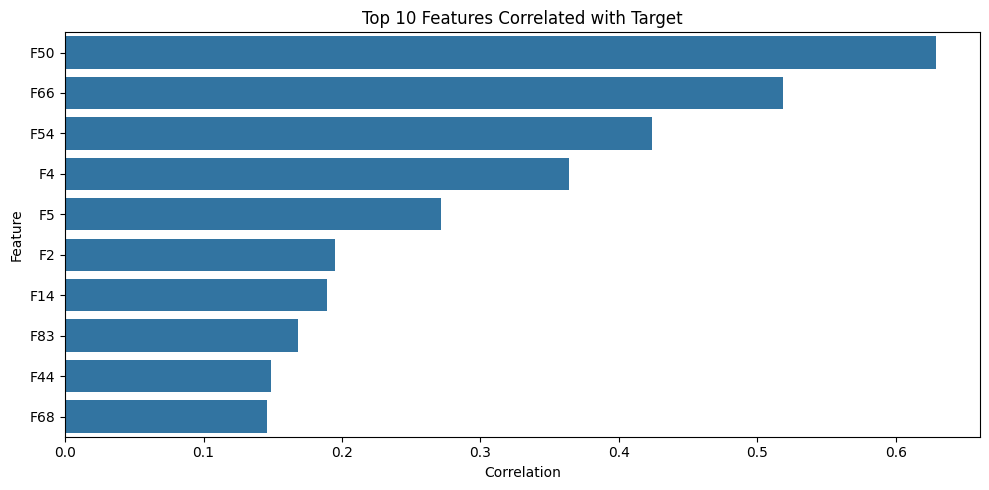

In [18]:
df = pd.DataFrame(X, columns=[f"F{i}" for i in range(X.shape[1])])
df["Target"] = y


correlations = df.corr()["Target"].drop("Target").sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=correlations[:10].values, y=correlations[:10].index)
plt.title("Top 10 Features Correlated with Target")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [19]:
df

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F91,F92,F93,F94,F95,F96,F97,F98,F99,Target
0,0.060230,-1.191303,0.068563,-0.245388,-1.415371,1.886186,-0.072829,-0.889514,0.521942,-1.918771,...,-0.034712,0.827183,0.482472,0.963376,-1.550663,-1.607483,0.184634,0.856399,-1.514847,19.643343
1,-0.223026,0.953009,0.176762,0.533695,-0.116571,0.734106,-0.614144,-0.391025,0.332760,-0.879644,...,1.762980,-0.913459,0.826422,0.667065,-0.366342,-0.145349,0.347397,0.891841,-0.444946,-54.863528
2,-0.769142,0.262561,-0.973546,1.422748,-0.675178,0.001205,-0.147780,0.965397,-0.327895,-1.607560,...,-0.264515,-0.316073,-2.296181,0.265362,0.807123,-0.524088,0.152355,0.300474,1.452468,-128.622291
3,1.667224,1.186735,-2.025808,0.231446,0.185176,-0.772659,-0.211667,-0.215668,0.228996,1.183494,...,-1.656623,1.355443,0.876456,0.665417,-0.417910,-1.668599,1.058729,-2.487809,-0.288039,63.657294
4,1.991553,0.018819,1.346226,-0.454548,0.491429,0.682069,0.664927,-0.091400,-0.387700,-0.674934,...,0.840734,-1.284584,-0.064184,0.175287,0.466545,0.140983,1.588627,-0.213457,-1.597599,214.040809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.872817,1.953107,-0.531878,1.605620,0.785185,1.607915,-1.886129,1.205818,-1.271549,0.291379,...,-0.035096,1.254519,-0.651889,0.236224,-1.364106,0.460797,-1.522334,1.677116,0.865290,364.628104
96,-0.201492,0.171839,0.463185,0.552300,-1.876553,-0.604745,-1.535572,-0.696772,0.015618,0.651522,...,-0.734174,-1.962626,0.731871,0.463206,0.296576,-0.847634,-0.652089,-0.244080,0.612469,-189.573205
97,0.797844,-0.091706,1.355573,-1.121244,0.243657,0.494064,0.185689,-0.132137,0.492986,-0.256341,...,1.856647,-0.101281,0.973102,-0.059826,-1.570881,-0.589892,0.698689,-0.430309,0.605606,-343.672719
98,-0.718407,-0.705012,-1.369803,-0.735530,0.125225,-0.701992,0.507991,1.091310,0.233786,-1.243863,...,-0.673491,0.141717,0.956702,0.169361,-0.557492,-0.581681,-1.014757,2.493000,-2.152891,42.784921


In [21]:
x_train , x_test ,y_train,y_test = train_test_split(df.drop(columns=['Target']),df['Target'],test_size=0.2, random_state=42)

In [24]:
x_train_bias= np.c_[np.ones((x_train.shape[0],1)),x_train]
x_test_bias= np.c_[np.ones((x_test.shape[0],1)),x_test]

In [28]:
# model param
theta_best = np.linalg.inv(x_train_bias.T @ x_train_bias) @ x_train_bias.T @ y_train

In [30]:
y_pred_train = x_train_bias @ theta_best
y_pred_test = x_test_bias @ theta_best

In [31]:
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE :", mean_squared_error(y_test, y_pred_test))
print("Test R²  :", r2_score(y_test, y_pred_test))

Train MSE: 8060674.78950789
Test MSE : 144211180.3360427
Test R²  : -8882.227545417623


In [35]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

X, y, true_coef = make_regression(
    n_samples=100,
    n_features=100,
    n_informative=10,
    noise=10.0,
    random_state=42,
    coef=True
)

df = pd.DataFrame(X, columns=[f"F{i}" for i in range(X.shape[1])])
df["Target"] = y

x_train, x_test, y_train, y_test = train_test_split(
    df.drop(columns=["Target"]), df["Target"], test_size=0.2, random_state=42
)

x_train_bias = np.c_[np.ones((x_train.shape[0], 1)), x_train]
x_test_bias = np.c_[np.ones((x_test.shape[0], 1)), x_test]

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

theta_best = np.linalg.pinv(x_train_bias) @ y_train_np

y_pred_train = x_train_bias @ theta_best
y_pred_test = x_test_bias @ theta_best

print("Train MSE:", mean_squared_error(y_train_np, y_pred_train))
print("Test MSE :", mean_squared_error(y_test_np, y_pred_test))
print("Test R²  :", r2_score(y_test_np, y_pred_test))


Train MSE: 1.1636774692626083e-25
Test MSE : 4323.549282609869
Test R²  : 0.7336747955896765


In [37]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the inbuilt model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Predict using the inbuilt model
y_pred_test_sklearn = lr.predict(x_test)
y_pred_train_sklearn = lr.predict(x_train)

# Evaluate the inbuilt model
print("\n===== Inbuilt LinearRegression =====")
print("Train MSE:", mean_squared_error(y_train, y_pred_train_sklearn))
print("Test MSE :", mean_squared_error(y_test, y_pred_test_sklearn))
print("Test R²  :", r2_score(y_test, y_pred_test_sklearn))


===== Inbuilt LinearRegression =====
Train MSE: 8.093658715010105e-26
Test MSE : 4342.431179766957
Test R²  : 0.7325116944449197
